In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading dataset

In [3]:
dataset = pd.read_csv('./dataset/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
dataset.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

### Exploring dataset

In [5]:
# Drop duplicate data
dataset.drop_duplicates(inplace=True)

In [6]:
# Check null data
dataset.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [7]:
dataset['Diabetes_binary'].value_counts()

1.0    35097
0.0    33960
Name: Diabetes_binary, dtype: int64

In [41]:
dataset.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,...,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000
mean,0.508232,0.571224,0.531329,0.974803,29.955834,0.481935,0.063643,0.150875,0.696483,0.605659,...,0.953908,0.096138,2.863692,3.840103,5.945306,0.258612,0.456464,8.604037,4.900285,5.651332
std,0.499936,0.494905,0.499021,0.156723,7.147972,0.499677,0.244118,0.357930,0.459780,0.488712,...,0.209687,0.294782,1.107950,8.231164,10.139113,0.437875,0.498105,2.858284,1.029338,2.175608
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,1.000000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,3.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


### Visualizing

<Axes: >

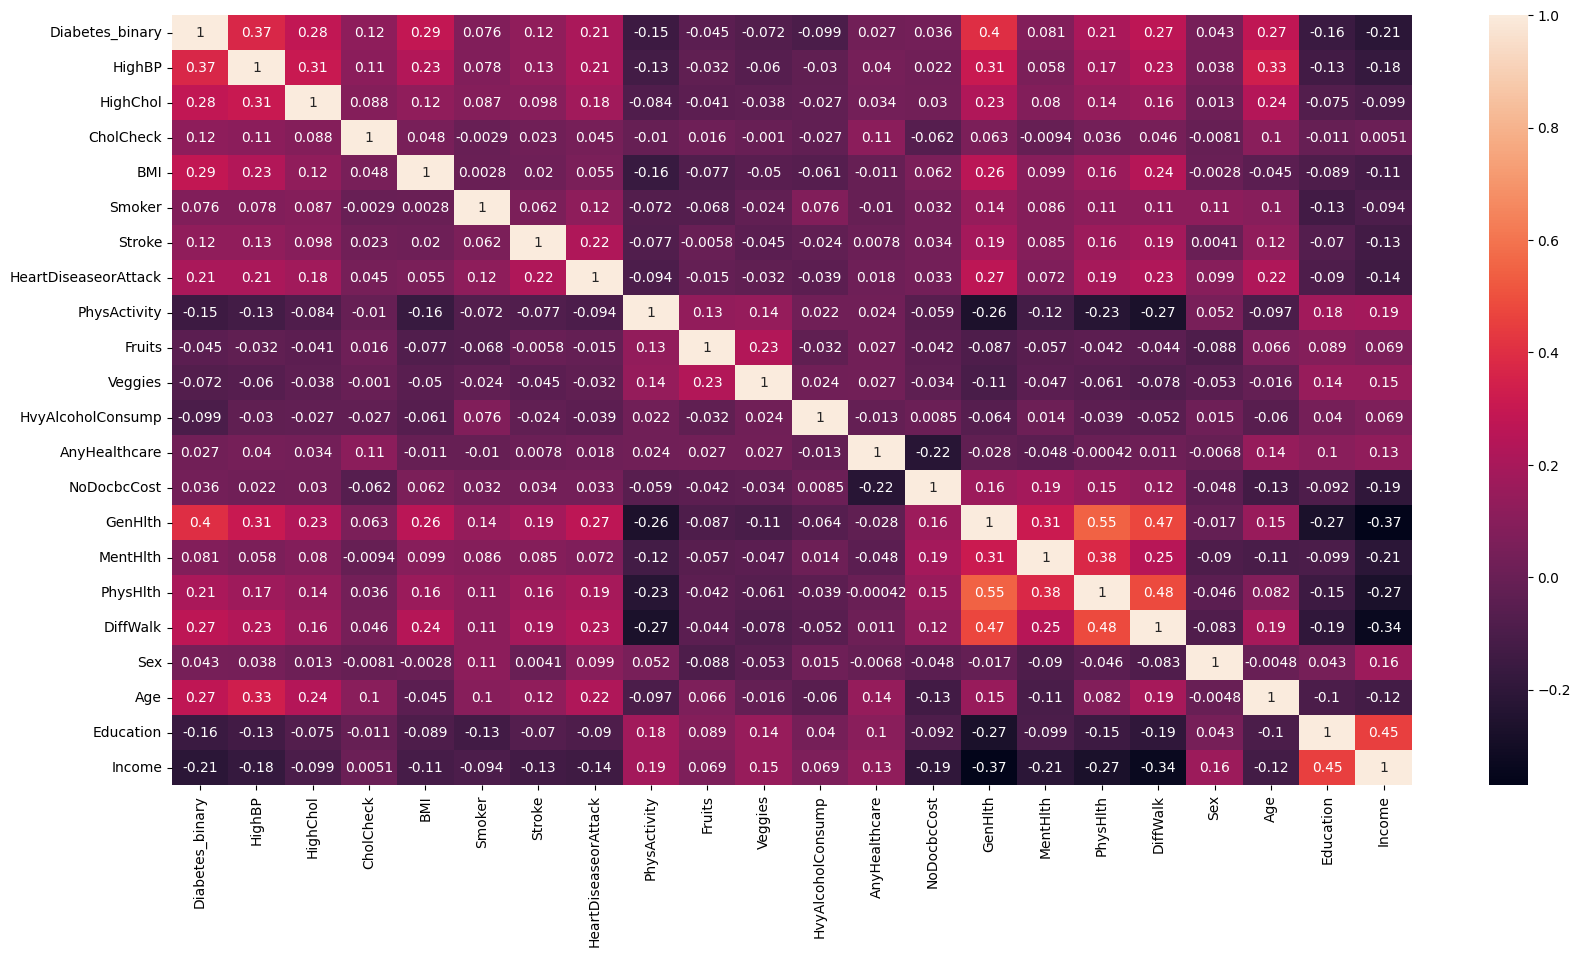

In [42]:
plt.figure(figsize=(20,10), dpi=100)

sns.heatmap(dataset.corr(), annot=True)

<Axes: >

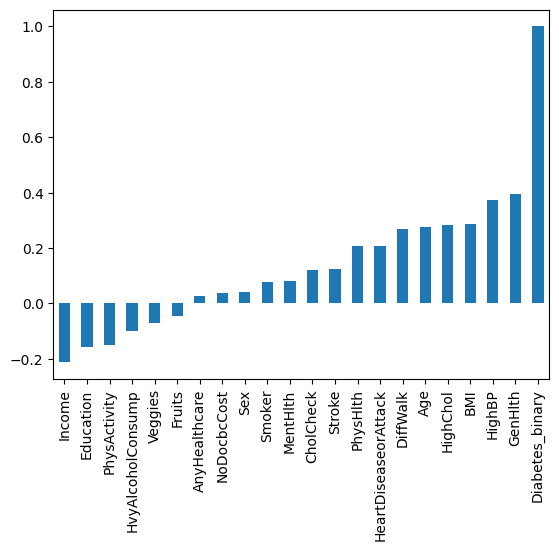

In [43]:
dataset.corr()['Diabetes_binary'].sort_values().plot(kind='bar')

<Axes: xlabel='Diabetes_binary', ylabel='count'>

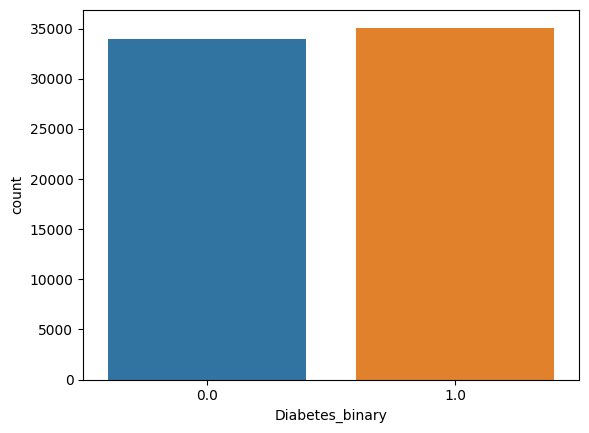

In [44]:
sns.countplot(data= dataset, x= 'Diabetes_binary')

### Modeling

#### Seperate data to feature X and label y

In [8]:
X = dataset.drop('Diabetes_binary',axis = 1)
y = dataset['Diabetes_binary']

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#### Split data to train and validation

In [10]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = .25, random_state = 42)

#### Normalize data with StandardScaler

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

#### Machine learning model

In [14]:
# LogisticRegression Model
logistic = LogisticRegression()
logistic.fit(X_train, y_train)
logistic.score(X_valid, y_valid)

0.7499565595134665

In [15]:
# Decision Tree Model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt.score(X_valid, y_valid)

0.6426875181002027

In [16]:
# GaussianNaiveBayes Model
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb.score(X_valid, y_valid)

0.7196640602374746

In [17]:
# RandomForest Model (Ensemble learning)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_valid, y_valid)

0.7366348103098754

#### Deep learning model

In [30]:
from keras import models, layers
from keras.callbacks import EarlyStopping

In [32]:
# Multi-layer perceptron
model = models.Sequential([
    layers.Dense(128, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid'),
])
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min', restore_best_weights=True)

In [33]:
model.compile(loss= 'binary_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

In [38]:
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), batch_size = 64, epochs=20, callbacks=[early_stopping])

Epoch 1/20
810/810 [==============================] - 5s 6ms/step - loss: 0.5059 - accuracy: 0.7507 - val_loss: 0.5033 - val_accuracy: 0.7568
Epoch 2/20
810/810 [==============================] - 3s 3ms/step - loss: 0.5046 - accuracy: 0.7517 - val_loss: 0.5024 - val_accuracy: 0.7578
Epoch 3/20
810/810 [==============================] - 3s 4ms/step - loss: 0.5033 - accuracy: 0.7518 - val_loss: 0.5045 - val_accuracy: 0.7547
Epoch 4/20
810/810 [==============================] - 4s 5ms/step - loss: 0.5016 - accuracy: 0.7541 - val_loss: 0.5053 - val_accuracy: 0.7541
Epoch 5/20
810/810 [==============================] - 2s 3ms/step - loss: 0.5006 - accuracy: 0.7547 - val_loss: 0.5047 - val_accuracy: 0.7568
Epoch 6/20
810/810 [==============================] - 2s 3ms/step - loss: 0.4988 - accuracy: 0.7547 - val_loss: 0.5037 - val_accuracy: 0.7566
Epoch 7/20
810/810 [==============================] - 2s 3ms/step - loss: 0.4976 - accuracy: 0.7557 - val_loss: 0.5056 - val_accuracy: 0.7563


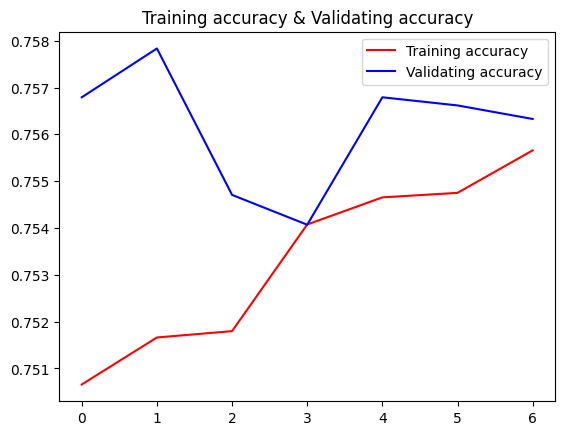

In [39]:
# Training accuracy vs val accuracy
history_ = history.history
acc, val_acc = history_["accuracy"], history_["val_accuracy"]
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validating accuracy')
plt.title('Training accuracy & Validating accuracy')
plt.legend()

plt.show()

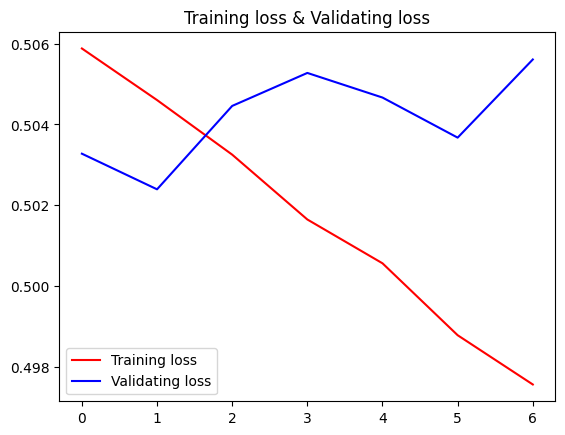

In [40]:
# Train loss vs val loss
train_loss, val_loss = history_["loss"], history_["val_loss"]
epochs = range(len(train_loss))
plt.plot(epochs, train_loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validating loss')
plt.title('Training loss & Validating loss')
plt.legend()

plt.show()